In [57]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

sig, sr = librosa.load(r"E:\develop\shorts-video-mixer\project\discord\audio\video_keeper_@hyezzi0801__완소 퍼펙트 공주님들과 함께 디스코드 #discord챌린지 #QWER.mp3", sr=22050)

sig2, sr2 = librosa.load(r"E:\develop\shorts-video-mixer\project\discord\audio\video_keeper_@joyseoworld__공주님들 만나고 왔습니다 들어줘 나의 Discord #QWER #Discord #Discord챌린지.mp3", sr=22050)

print(sig.shape,sr)



(549707,) 22050


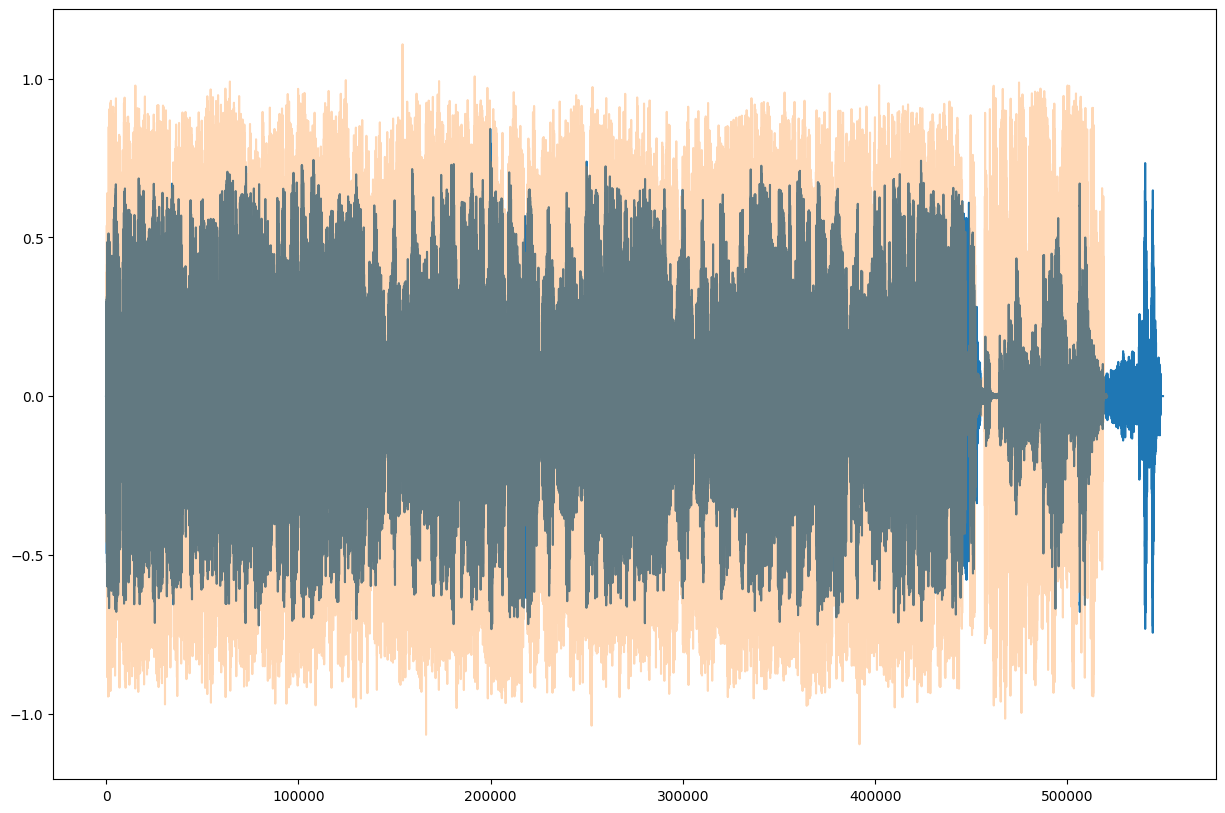

In [5]:
# 두 개의 오디오를 같은 x축 상에서 비교

plt.figure(figsize=(15,10))

plt.plot(sig, label="video_keeper_@hyezzi0801__완소 퍼펙트 공주님들과 함께 디스코드 #discord챌린지 #QWER.mp3")

# 투명도 30%로 설정

plt.plot(sig2, label="video_keeper_@joyseoworld__공주님들 만나고 왔습니다 들어줘 나의 Discord #QWER #Discord #Discord챌린지.mp3", alpha=0.3)



plt.show()


Text(0.5, 1.0, 'Spectrogram (dB)')

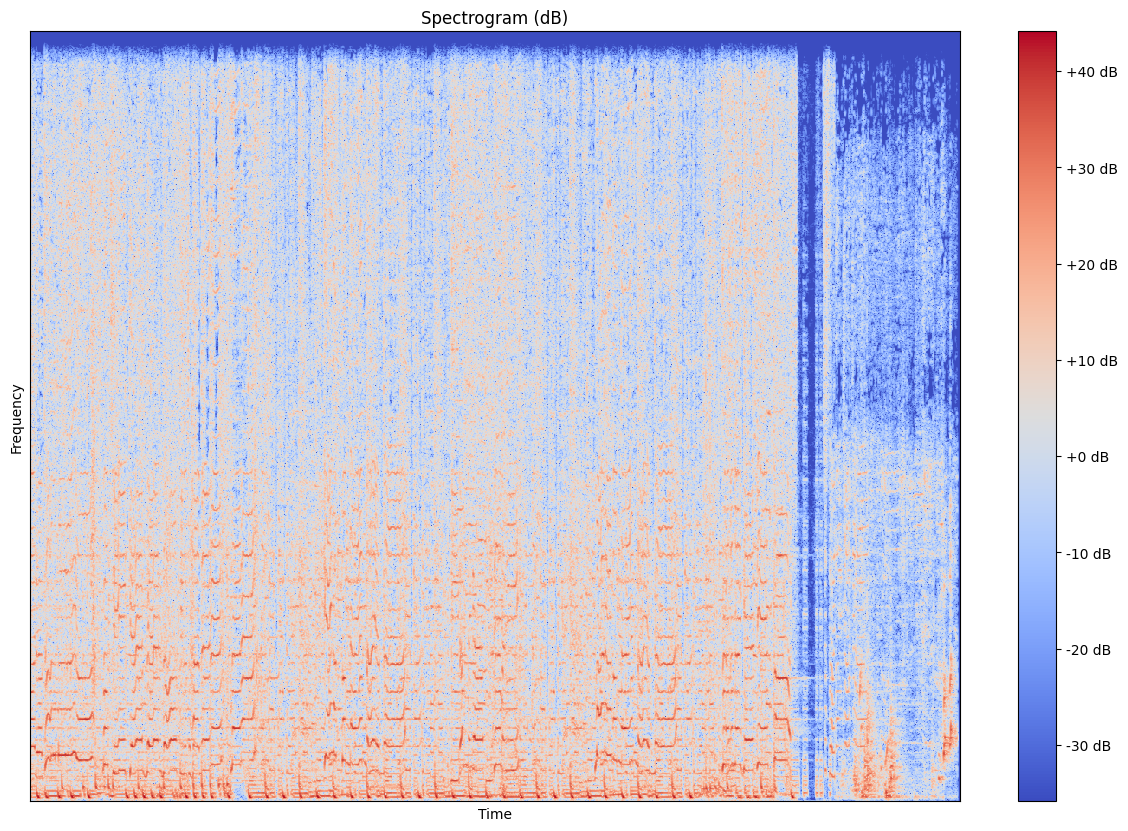

In [52]:
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Spectrogram (dB)')

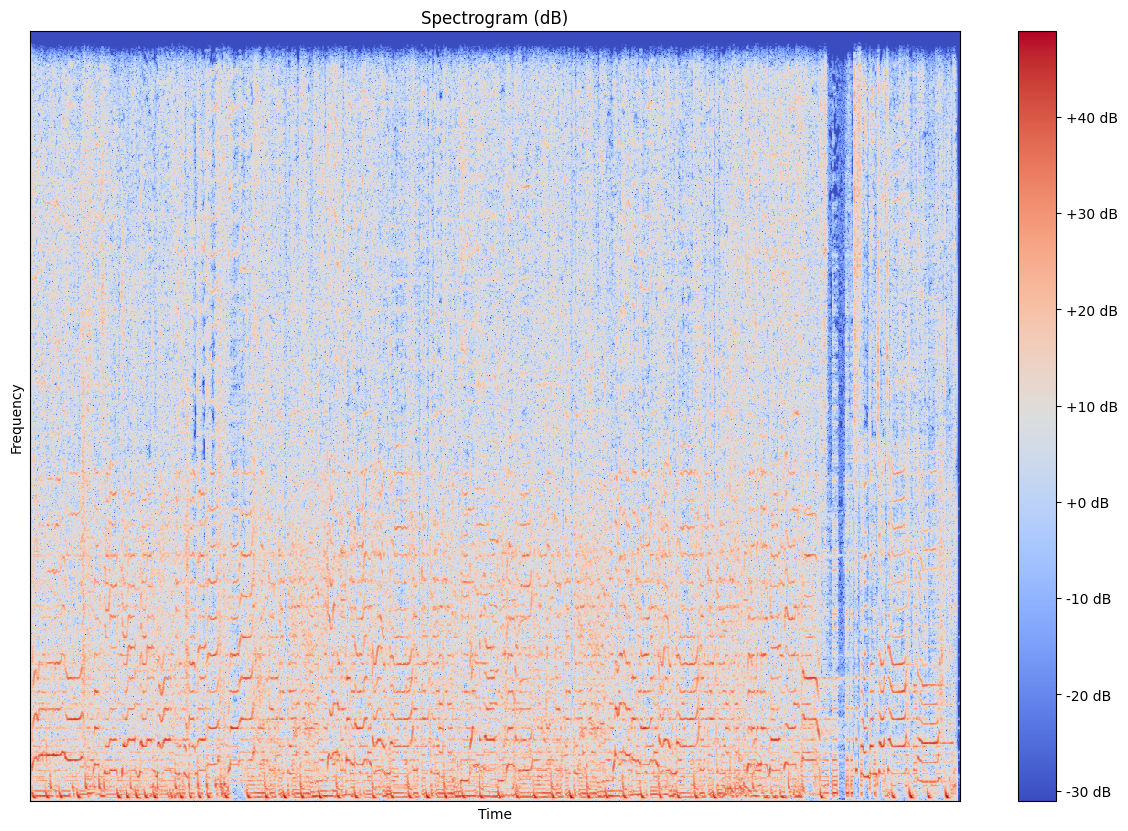

In [55]:
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr2
n_fft_duration = float(n_fft)/sr2

# STFT
stft = librosa.stft(sig2, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sr2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

# 각 프레임의 peak를 찾아서 그래프로




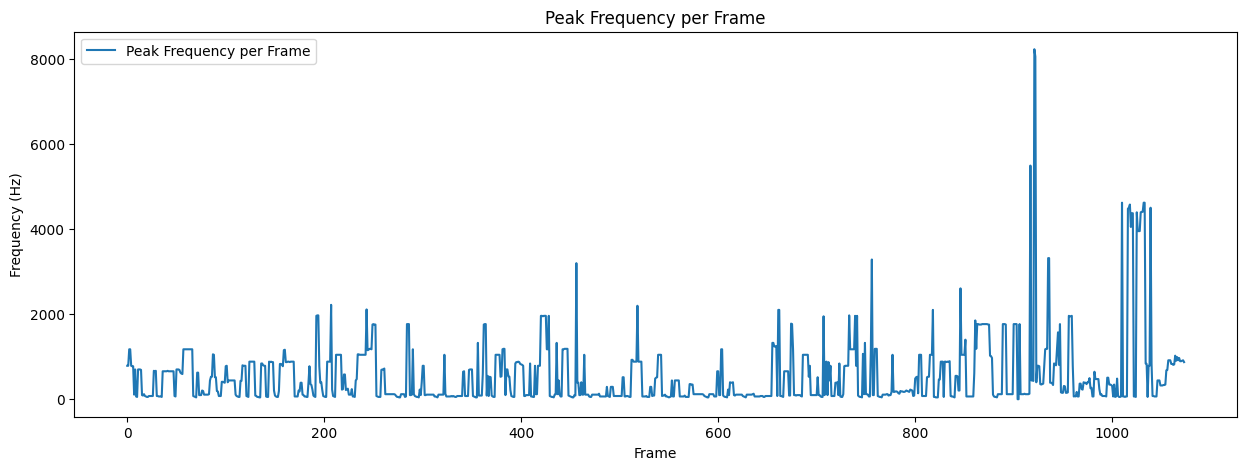

In [54]:
frequencies = np.fft.rfftfreq(n_fft, 1/sr)
peak_freqs = []

for mag in magnitude.T:
    peak_idx = np.argmax(mag)
    peak_freqs.append(frequencies[peak_idx])

plt.figure(figsize=(15, 5))
plt.plot(peak_freqs, label="Peak Frequency per Frame")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Peak Frequency per Frame")
plt.legend()
plt.show()


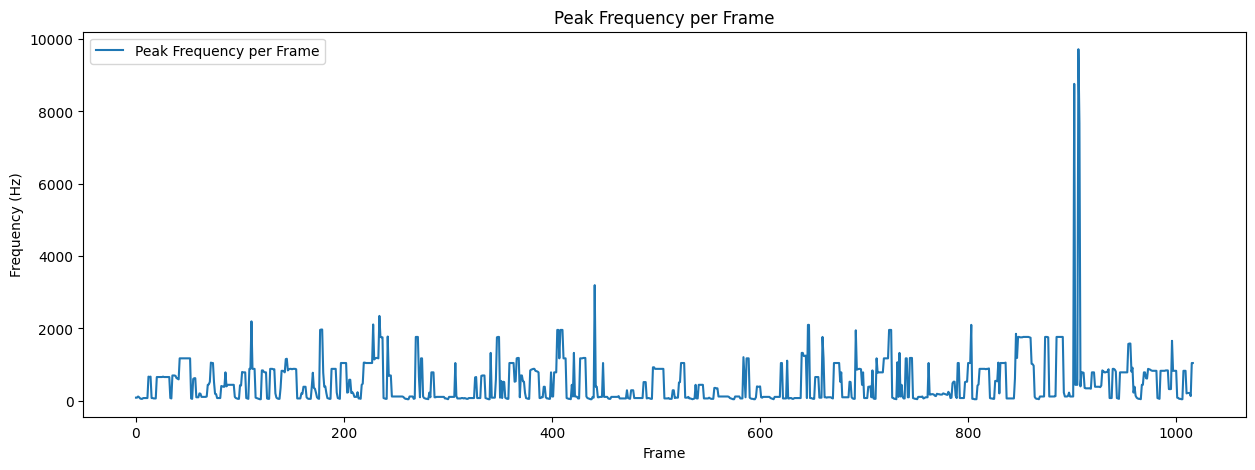

In [56]:
frequencies = np.fft.rfftfreq(n_fft, 1/sr)
peak_freqs = []

for mag in magnitude.T:
    peak_idx = np.argmax(mag)
    peak_freqs.append(frequencies[peak_idx])

plt.figure(figsize=(15, 5))
plt.plot(peak_freqs, label="Peak Frequency per Frame")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Peak Frequency per Frame")
plt.legend()
plt.show()
